## 4.1 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
5장에서 사용할 데이터인 쿼라 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  

In [5]:
import zipfile

In [6]:
DATA_IN_PATH = './data_in/'

In [7]:
# 캐글에서 받은 데이터 압축 풀기
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [8]:
# 필요한 라이브러리 불러오기
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# 학습 데이터를 판다스 데이터프레임으로 열어서 확인해본다
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

# qid1, qid2: 각 질문들의 고유한 인덱스 값
# is_duplicated: 두개의 질문이 중복이 아니면 0, 중복이면 1

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [10]:
# 데이터 파일의 이름과 크기 확인
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')
        
# 보통 훈련 데이터가 평가데이터보다 큰데 quora는 평가데이터가 훈련 데이터보다 5배정도 크다.
# quora의 경우 질문에 대해 데이터의 수가 적다면 각각을 검색을 통해 중복을 찾아내는 편법을 사용할 수 있는데
# 이러한 편법을 방지하기 위해 쿼라에서 직접 컴퓨터가 만든 질문 쌍을 평가 데이터에 임의적으로 추가했기 떄문이다.
# 따라서 평가데이터는 크지만 실제 질문 데이터는 얼마 되지 않는다.

파일 크기 : 
sample_submission.csv         22.35MB
test.csv                      477.59MB
train.csv                     63.4MB


In [11]:
# 전체 학습 데이터 개수 확인(질문 쌍의 개수)
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 404290


In [12]:
# 지금 하나의 데이터에 두개의 질문이 있는 구조다.
# 전체 질문을 한번에 분석하기 위해 판다스의 시리즈를 통해 두 개의 질문을 하나로 합친다.
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
# 판다스 시리즈로 합쳐졌는지 확인해본다.
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [13]:
# 중복을 제거한 유일한 질문 값만 확인
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
# 중복되는 질문의 정확한 개수 확인
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

# 결과를 보면 80만 개의 데이터에서 53만개가 유니크 데이터이므로 27만 개가 중복돼 있음을 알 수 있고
# 27만 개의 데이터는 11만 개의 데이터의 고유한 질문으로 이뤄져 있음을 알 수 있다.

교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, 'Number of questions')

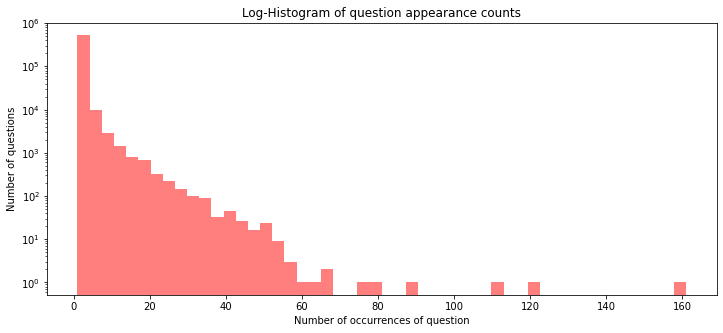

In [14]:
# 중복 개수, 동일한 중복 횟수를 가진 질문의 개수 히스토그램으로 확인

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [15]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x19cbc528190>,
 'caps': [<matplotlib.lines.Line2D at 0x19cbc528850>,
 'boxes': [<matplotlib.lines.Line2D at 0x19cbc51cdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x19cbc528f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x19cbc5105e0>],
 'means': [<matplotlib.lines.Line2D at 0x19cbc510280>]}

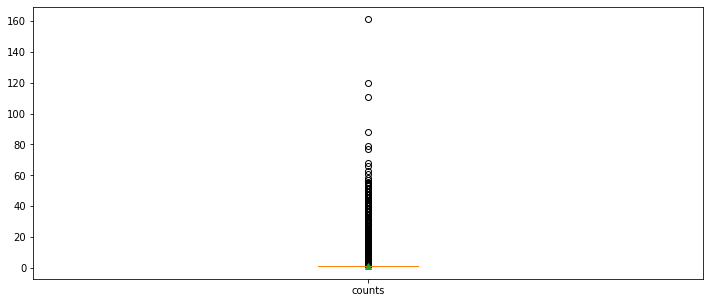

In [16]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

# 증복 횟수의 이상치가 너무 넓고 많이 분포해서 박스 플롯의 다른 값을 확인하기 조차 어려운 데이터다.

(-0.5, 799.5, 599.5, -0.5)

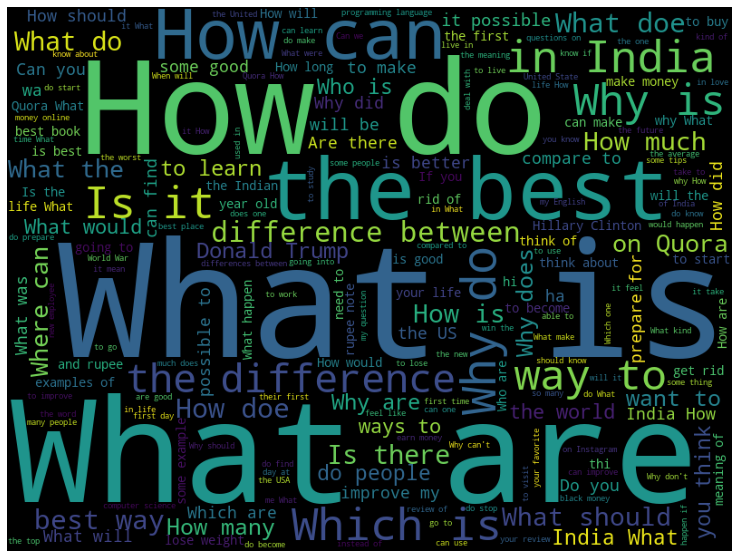

In [17]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

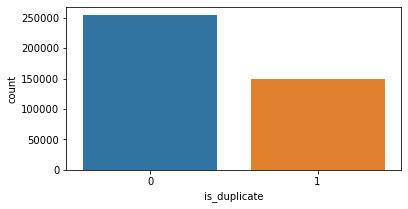

In [18]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

# 이 상태로 학습한다면 중복이 아닌 데이터 25만개에 의존도가 높아지면서 데이터가 한쪽 라벨로 편향된다.
# 이를 해결하기 위해서는 라벨의 개수를 균형 있게 맞춰준 후 진행하는 것이 좋다.

In [19]:
train_length = train_set.apply(len)

Text(0, 0.5, 'Probability')

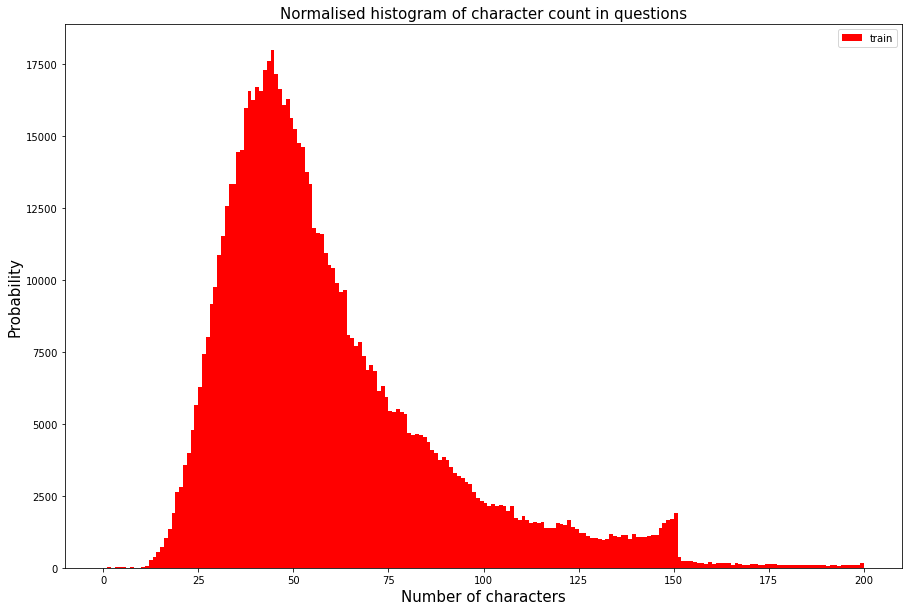

In [21]:
# 텍스트 길이 분석
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

In [22]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

# 최대값처럼 평균에서 차이가 많이 나는 데이터는 제외하고 하는것이 좋다.

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x19c91772790>,
 'caps': [<matplotlib.lines.Line2D at 0x19c91772e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c91772430>],
 'medians': [<matplotlib.lines.Line2D at 0x19c91783550>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c91783bb0>],
 'means': [<matplotlib.lines.Line2D at 0x19c91783850>]}

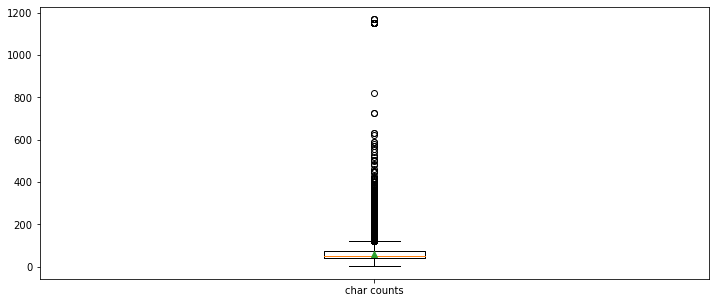

In [23]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length,
             labels=['char counts'],
             showmeans=True)

# 문자 수의 이상치 데이터가 너무 많이 분포해서 박스 플롯의 다른 값을 확인하기조차 어려운 상태이다.

In [24]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

Text(0, 0.5, 'Prabability')

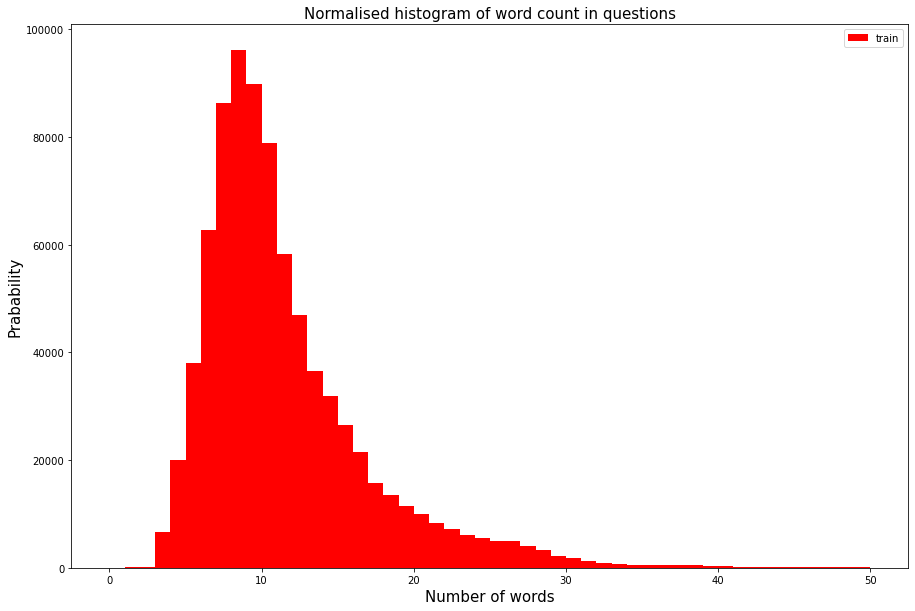

In [26]:
# 단어 개수 분석(단어의 기준은 띄어쓰기)
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [27]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x19c9bbfe9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x19c9bbf20d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c9bbfe670>],
 'medians': [<matplotlib.lines.Line2D at 0x19c9bbf2730>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c9bbf2d30>],
 'means': [<matplotlib.lines.Line2D at 0x19c9bbf2a00>]}

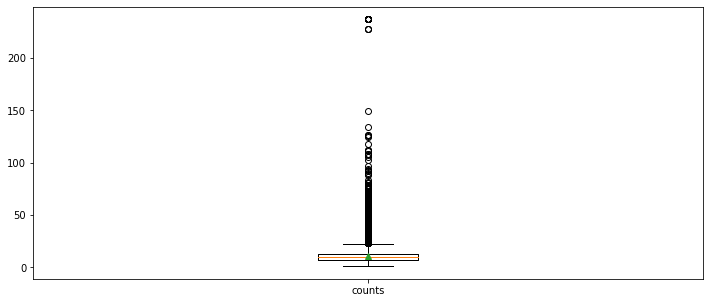

In [28]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [30]:
# 특정 경우 확인
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('마침표를 포함한 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

# 모든 질문들이 보편적으로 가지고 있는 특징(물음표, 첫글자가 대문자)들은 여기서는 제거한다.

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
마침표를 포함한 질문: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


### 데이터 전처리

In [31]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [32]:
DATA_IN_PATH = './data_in/'
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

In [33]:
# 학습 데이터 불러오기
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [34]:
# 데이터 개수를 비슷하게 맞추기

# 중복인 데이터
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
# 중복이 아닌 데이터
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

# 중복인 데이터와 중복이 아닌 데이터의 차이
class_difference = len(train_neg_data) - len(train_pos_data)
# 적은 데이터의 개수가 많은 데이터에 대한 비율을 계산
sample_frac = 1 - (class_difference / len(train_neg_data))
# 위의 비율을 개수가 많은 데이터에 샘플링
train_neg_data = train_neg_data.sample(frac = sample_frac)

In [35]:
print("중복 질문 개수: {}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {}".format(len(train_neg_data)))

# 샘플링 결과 개수가 같아졌음을 알 수 있다.

중복 질문 개수: 149263
중복이 아닌 질문 개수: 149263


In [36]:
# 질문 쌍을 다시 하나의 질문 리스트로 만든다.
train_data = pd.concat([train_neg_data, train_pos_data])

In [37]:
# 전처리(구두점 및 기호 제거, 모든 문자 소문자로 변환)

# 패턴객체 생성(FILTERS: 위에서 필터링 하고자 하는 문자를 지정한 전역변수)
change_filter = re.compile(FILTERS)

# 첫번째 질의문의 리스트 생성 
questions1 = [str(s) for s in train_data['question1']]
# 두번째 질의문의 리스트 생성
questions2 = [str(s) for s in train_data['question2']]

# 전처리된 질의문들을 넣을 빈 리스트 생성
filtered_questions1 = list()
filtered_questions2 = list()

# 빈 리스트에 전처리된 문장 넣기(앞서 정의한 필터에 해당하는 문자열을 제거하고 모든 알파벳 문자를 소문자로 바꾼다.)
for q in questions1:
     filtered_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in questions2:
     filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [38]:
# 토큰화

# 토크나이징 객체 생성
tokenizer = Tokenizer()
# 각 리스트를 토크나이징
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

In [39]:
# 단어들을 각 단어의 인덱스로 변환 
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [40]:
# 패딩
# MAX_SEQUENCE_LENGTH: 단어 개수의 99%인 31로 설정하였다.
# 짧은 데이터는 뒤에 패딩값을 채워 넣도록 하였다.
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [41]:
# 단어사전 생성
word_vocab = {}
word_vocab = tokenizer.word_index 

# 라벨값 넘파이 배열로 생성
labels = np.array(train_data['is_duplicate'], dtype=int)

print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76607


In [42]:
# 단어 사전과 단어 개수 저장
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [43]:
# 첫번째 질의문, 두번째 질의문, 일치하는지 여부, 단어사전과 단어개수 각각 저장
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [44]:
# 평가 데이터 불러오기
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

C:\Users\jch\anaconda3\envs\pr_tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [45]:
# 평가 데이터 전처리
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [46]:
# 평가 데이터 토큰화
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)
# 평가 데이터 패딩
test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [47]:
# 평가 데이터의 아이디 넘파이 배열로 생성(평가데이터는 라벨이 없다)
# 캐글에 제출하기 위해선 데이터의 id값이 필요하기 때문
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [48]:
# 각각 저장
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)